In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
file_path = 'telecom_churn.csv'  # Update with your actual file path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [11]:


# No missing values detected
# Normalization/Scaling
scaler = StandardScaler()

# Separate features and target variable
X = data.drop(columns=['Churn'])
y = data['Churn']

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first few rows of the scaled data
X_scaled_df.head()


,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0.676489,0.327580,1.617086,1.480204,-0.427932,1.566767,0.476643,1.990727,-0.071584,-0.085008
1,0.149065,0.327580,1.617086,2.266072,-0.427932,-0.333738,1.124503,1.564510,-0.107082,1.240482
2,0.902529,0.327580,-0.618396,-0.641642,-1.188218,1.168304,0.675985,-0.262133,-1.574346,0.703121
3,-0.428590,-3.052685,-0.618396,-0.641642,0.332354,2.196596,-1.466936,0.042307,-2.741846,-1.303026
4,-0.654629,-3.052685,-0.618396,-0.641642,1.092641,-0.240090,0.626149,-0.931902,-1.037927,-0.049184


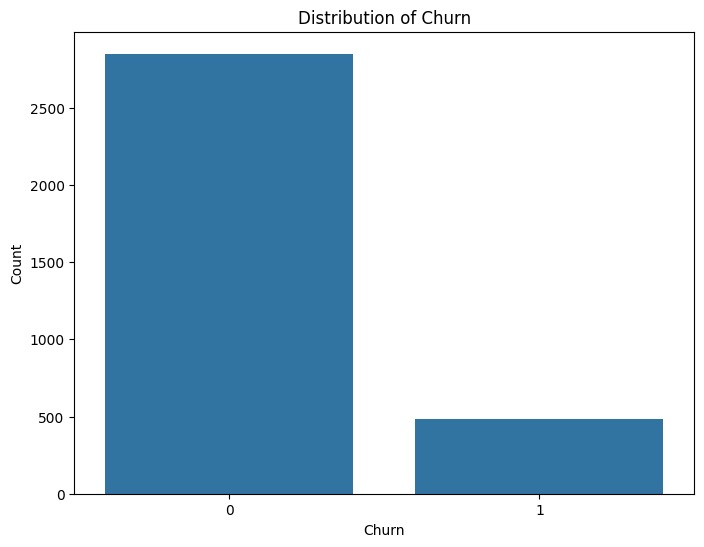

In [12]:


# Plot the distribution of the target variable (Churn)
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=data)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()


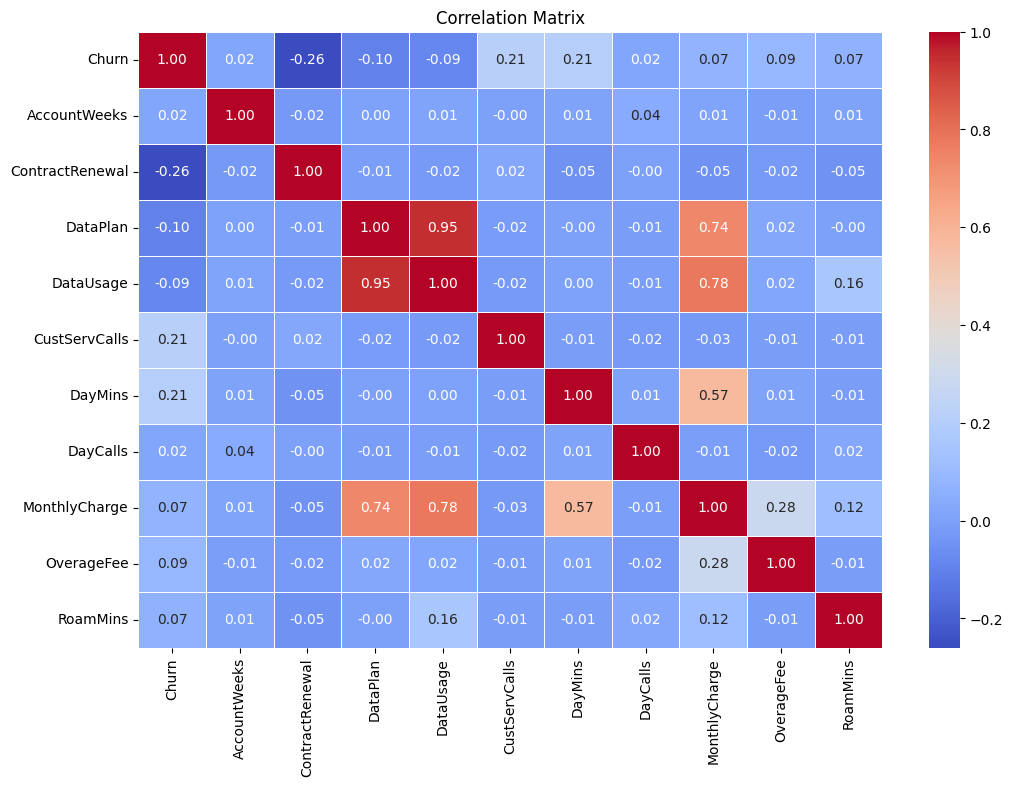

In [13]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


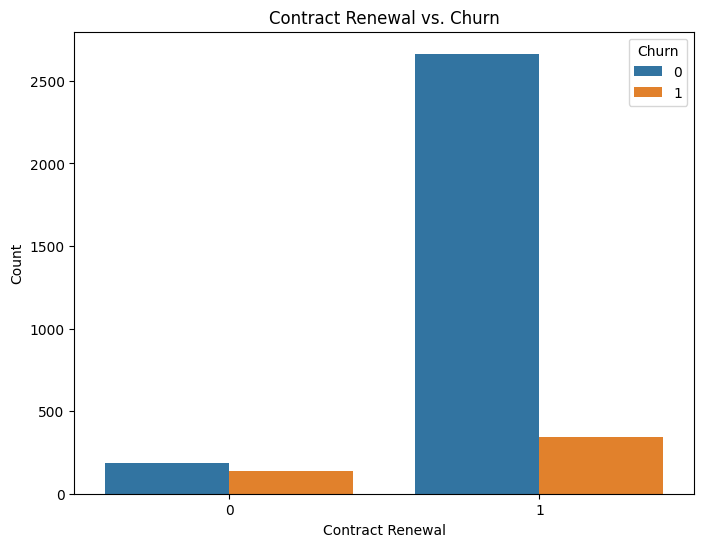

In [14]:
# Plot Contract Renewal vs. Churn
plt.figure(figsize=(8, 6))
sns.countplot(x='ContractRenewal', hue='Churn', data=data)
plt.title('Contract Renewal vs. Churn')
plt.xlabel('Contract Renewal')
plt.ylabel('Count')
plt.show()


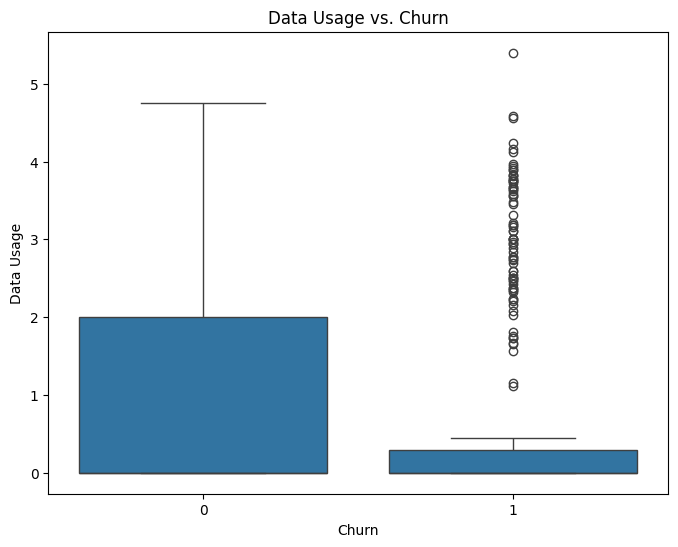

In [15]:
# Plot Data Usage vs. Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='DataUsage', data=data)
plt.title('Data Usage vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Data Usage')
plt.show()


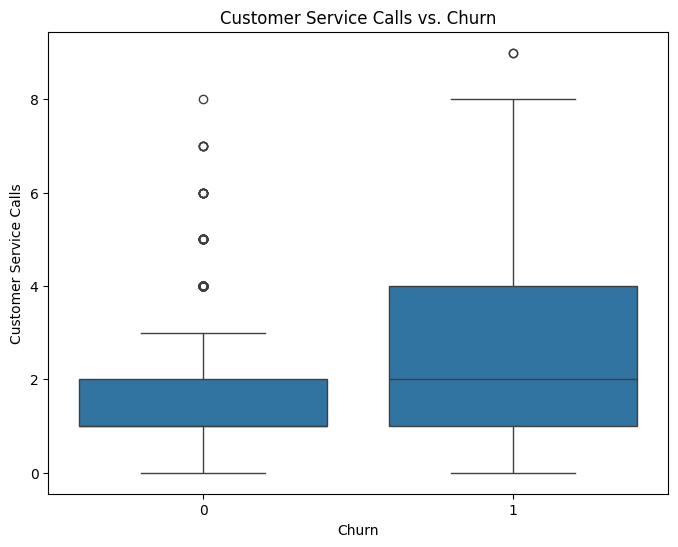

In [16]:
# Plot Customer Service Calls vs. Churn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='CustServCalls', data=data)
plt.title('Customer Service Calls vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Customer Service Calls')
plt.show()


In [17]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train a logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the logistic regression model
log_reg_report = classification_report(y_test, y_pred_log_reg)
log_reg_conf_matrix = confusion_matrix(y_test, y_pred_log_reg)

# Print evaluation results for Logistic Regression
print("Logistic Regression Report:\n", log_reg_report)
print("Logistic Regression Confusion Matrix:\n", log_reg_conf_matrix)


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.62      0.18      0.28       101

    accuracy                           0.86       667
   macro avg       0.75      0.58      0.60       667
weighted avg       0.83      0.86      0.82       667

Logistic Regression Confusion Matrix:
 [[555  11]
 [ 83  18]]


In [18]:


# Initialize and train a random forest classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the random forest model
rf_report = classification_report(y_test, y_pred_rf)
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Print evaluation results for Random Forest
print("\nRandom Forest Report:\n", rf_report)
print("Random Forest Confusion Matrix:\n", rf_conf_matrix)



Random Forest Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       566
           1       0.86      0.61      0.72       101

    accuracy                           0.93       667
   macro avg       0.90      0.80      0.84       667
weighted avg       0.92      0.93      0.92       667

Random Forest Confusion Matrix:
 [[556  10]
 [ 39  62]]
